In [ ]:
from pandas import read_csv
import numpy as np
import pandas as pd
from scipy.linalg import svd
from numpy import diag
from numpy import dot
from numpy import zeros
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import cv2
import os
from skimage.io import imread, imshow
import matplotlib.pyplot as plt
from skimage.transform import resize
from sklearn.model_selection import cross_val_score

In [ ]:
#Reading the dataset
filename = 'C:/Users/TheVo/Google Drive/NCAT PHD Courses/CSE 805 Machine Learning Files/Final Exam Study/Final Exam Datasets/audi.csv'
Audi_base = read_csv(filename)
Audi_base.dtypes

model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax               int64
mpg             float64
engineSize      float64
dtype: object

In [ ]:
#checking unique values in transmission, fueltype and model columns
print(Audi_base.transmission.unique())
print(Audi_base.fuelType.unique())
print(Audi_base.model.unique())

['Manual' 'Automatic' 'Semi-Auto']
['Petrol' 'Diesel' 'Hybrid']
[' A1' ' A6' ' A4' ' A3' ' Q3' ' Q5' ' A5' ' S4' ' Q2' ' A7' ' TT' ' Q7'
 ' RS6' ' RS3' ' A8' ' Q8' ' RS4' ' RS5' ' R8' ' SQ5' ' S8' ' SQ7' ' S3'
 ' S5' ' A2' ' RS7']


In [ ]:
#Converting the three columns transmission, fueltype and model to numerical columns
Audi_numeric = Audi_base
Audi_numeric['transmission'] = Audi_numeric['transmission'].astype('category')
Audi_numeric['fuelType'] = Audi_numeric['fuelType'].astype('category')
Audi_numeric['model'] = Audi_numeric['model'].astype('category')
Audi_numeric.dtypes
cat_columns = Audi_numeric.select_dtypes(['category']).columns
Audi_numeric[cat_columns] = Audi_numeric[cat_columns].apply(lambda x: x.cat.codes)
#resetting the base dataframe to the original values
Audi_base = read_csv(filename)
Audi_numeric.dtypes

model              int8
year              int64
price             int64
transmission       int8
mileage           int64
fuelType           int8
tax               int64
mpg             float64
engineSize      float64
dtype: object

In [ ]:
print(Audi_numeric.transmission.unique())
print(Audi_numeric.fuelType.unique())
print(Audi_numeric.model.unique())

[1 0 2]
[2 0 1]
[ 0  5  3  2  9 10  4 20  8  6 25 11 17 14  7 12 15 16 13 23 22 24 19 21
  1 18]


In [ ]:
#taking the first 10 rows of numeric dataset
A_original = Audi_numeric.head(10)
A = A_original.values
print("\nA is: ", A)


A is:  [[0.0000e+00 2.0170e+03 1.2500e+04 1.0000e+00 1.5735e+04 2.0000e+00
  1.5000e+02 5.5400e+01 1.4000e+00]
 [5.0000e+00 2.0160e+03 1.6500e+04 0.0000e+00 3.6203e+04 0.0000e+00
  2.0000e+01 6.4200e+01 2.0000e+00]
 [0.0000e+00 2.0160e+03 1.1000e+04 1.0000e+00 2.9946e+04 2.0000e+00
  3.0000e+01 5.5400e+01 1.4000e+00]
 [3.0000e+00 2.0170e+03 1.6800e+04 0.0000e+00 2.5952e+04 0.0000e+00
  1.4500e+02 6.7300e+01 2.0000e+00]
 [2.0000e+00 2.0190e+03 1.7300e+04 1.0000e+00 1.9980e+03 2.0000e+00
  1.4500e+02 4.9600e+01 1.0000e+00]
 [0.0000e+00 2.0160e+03 1.3900e+04 0.0000e+00 3.2260e+04 2.0000e+00
  3.0000e+01 5.8900e+01 1.4000e+00]
 [5.0000e+00 2.0160e+03 1.3250e+04 0.0000e+00 7.6788e+04 0.0000e+00
  3.0000e+01 6.1400e+01 2.0000e+00]
 [3.0000e+00 2.0160e+03 1.1750e+04 1.0000e+00 7.5185e+04 0.0000e+00
  2.0000e+01 7.0600e+01 2.0000e+00]
 [2.0000e+00 2.0150e+03 1.0200e+04 1.0000e+00 4.6112e+04 2.0000e+00
  2.0000e+01 6.0100e+01 1.4000e+00]
 [0.0000e+00 2.0160e+03 1.2000e+04 1.0000e+00 2.2451e+04

In [ ]:
# Question 1: Performing SVD 
U, s, VT = svd(A)
print("\n the U matrix shape is: \n", U.shape, "\n")
print("the s vector shape is: \n",s.shape, "\n")
print("the VT shape is: \n", VT.shape, "\n")
print("\n the U matrix is: \n", U, "\n")
print("the s vector is: \n",s, "\n")
print("the VT is: \n", VT, "\n")
#Reconstructing the matrix
Sigma = zeros((A.shape[0], A.shape[1]))
# populate Sigma with n x n diagonal matrix
Sigma[:A.shape[1], :A.shape[1]] = diag(s)
# reconstruct
B = U.dot(Sigma.dot(VT))
print("Reconstructed matrix: \n", B)
n_elements=3
Sigma = Sigma[:, :n_elements]
VT = VT[:n_elements, :]
# transform
T = U.dot(Sigma)
print("\nTransformed matrix 1: \n", T)
T = A.dot(VT.T)
print("\nTransformed matrix 2: \n", T)


 the U matrix shape is: 
 (10, 10) 

the s vector shape is: 
 (9,) 

the VT shape is: 
 (9, 9) 


 the U matrix is: 
 [[-1.31890280e-01 -3.18276241e-01 -3.68588722e-01 -5.63955467e-01
   1.35143076e-02  5.13168820e-02  2.13032733e-01  7.37153317e-02
   5.59984479e-01 -2.45328764e-01]
 [-2.80332092e-01 -2.61336215e-01  3.68752436e-01  5.17523775e-01
   2.08083853e-01  4.45996167e-01  9.34868963e-02  8.27287026e-02
   3.32196242e-01 -2.84883191e-01]
 [-2.27147321e-01 -1.18664824e-01 -4.48762218e-01  1.66456242e-01
  -6.03084659e-02 -5.19910492e-03  8.68404496e-02  3.79904715e-01
  -5.48394998e-01 -4.98956385e-01]
 [-2.10192219e-01 -3.76072462e-01  3.17790857e-01 -3.65036720e-01
   5.30160302e-01 -2.66813463e-02  2.49074954e-01  1.22075576e-02
  -4.25760662e-01  2.34317221e-01]
 [-4.59241060e-02 -6.36565316e-01  1.72232018e-01 -9.68384309e-02
  -4.95596331e-01  3.11334704e-02 -5.22566063e-01 -1.28906649e-01
  -1.31744686e-01  3.64088765e-04]
 [-2.48396893e-01 -2.03836371e-01 -2.64670503e

In [ ]:
#Q1 doing PCA
X = A
components = 2
pca = PCA(n_components=components)
fit = pca.fit(X)
exp_var_pca = pca.explained_variance_ratio_
print("\nexplained variance ratio sum for", components, "components is: " , sum(exp_var_pca))
print("\nthe components of PCA are: ", fit.components_)
PCA_comp = fit.components_


explained variance ratio sum for 2 components is:  0.9999970085932953

the components of PCA are:  [[ 4.57205408e-05 -2.76422738e-05 -4.25921866e-02 -4.96076737e-06
   9.99091314e-01 -2.64130346e-05 -1.55401883e-03  1.80671249e-04
   1.05635422e-05]
 [ 5.99893235e-04  2.21948249e-04  9.99063136e-01 -1.53751103e-04
   4.26025108e-02 -2.94370761e-04  7.52675808e-03  8.36431213e-04
   6.92532569e-05]]


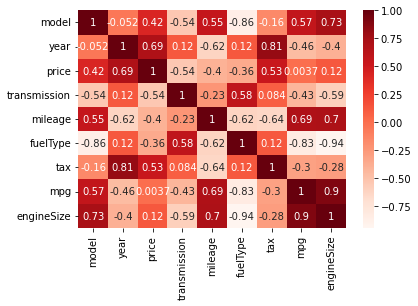

In [ ]:
#Q1-e finding the two highest correlated variables
cor = A_original.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

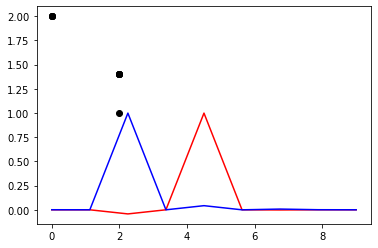

In [ ]:
#Q1-e plotting the variables "fuelType" and "engine size" and the two PCA components
x = X[:,5]
y = X[:,8]
plt.plot(x, y, 'o', color='black');
x2 = np.linspace(0, 9, num=9)
y2 = PCA_comp[0,:]
y3 = PCA_comp[1,:]
plt.plot(x2, y2, color='red');
plt.plot(x2, y3, color='blue');
plt.show()

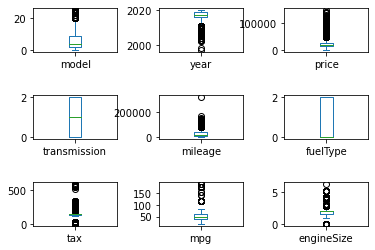


There are  364  outlier elements in column  model

There are  123  outlier elements in column  year

There are  136  outlier elements in column  price

There are  0  outlier elements in column  transmission

There are  147  outlier elements in column  mileage

There are  0  outlier elements in column  fuelType

There are  46  outlier elements in column  tax

There are  33  outlier elements in column  mpg


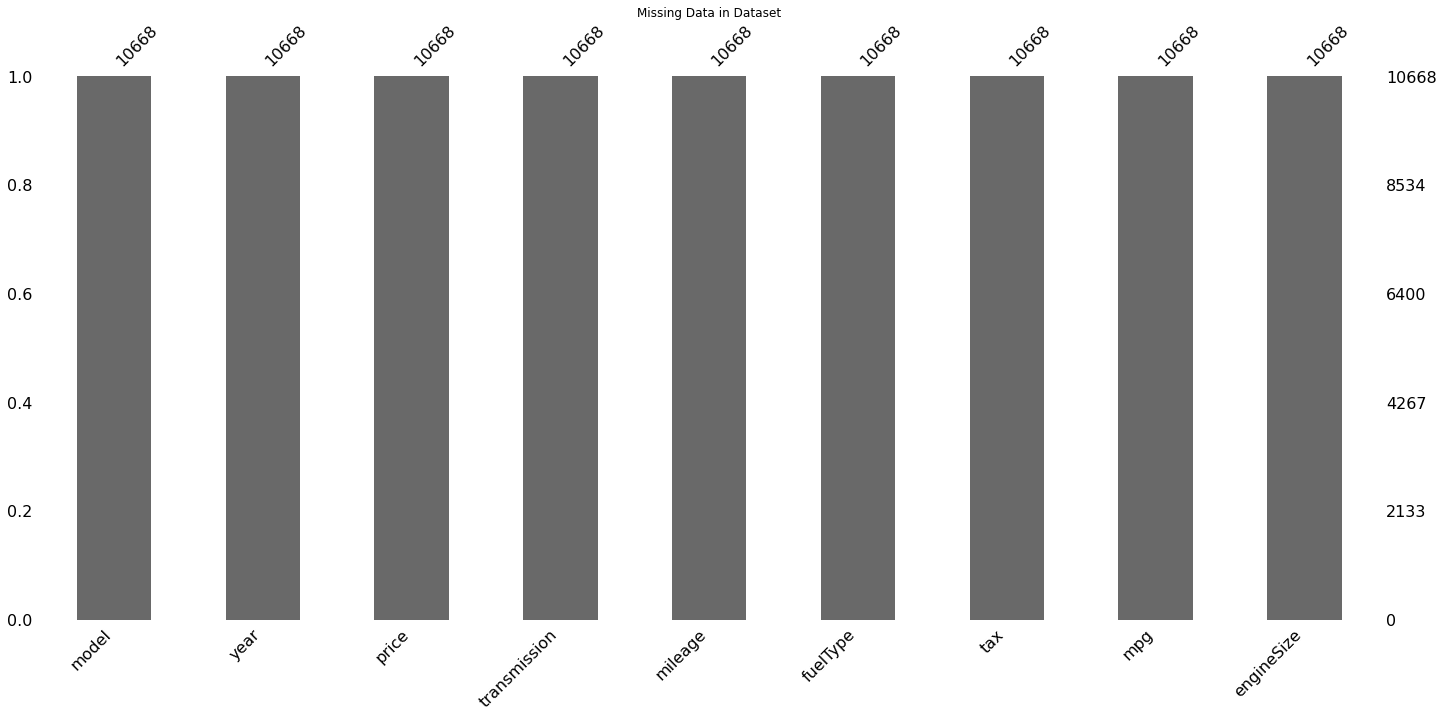

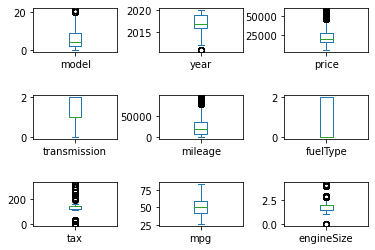

In [ ]:
#cleaning the dataset
#checking for outliers and missing data
Audi_cleaned = Audi_numeric
Audi_cleaned.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.subplots_adjust(wspace=0.5, hspace=1)
plt.show()
msno.bar(Audi_cleaned)
plt.title('Missing Data in Dataset')
mean = Audi_cleaned.mean()
std = Audi_cleaned.std()
outrows = []
for j in range(0, len(Audi_cleaned.columns)-1):
    outlier = 0
    for i in range(0, len(Audi_cleaned.index)):
        z_score = (Audi_cleaned.iloc[i,j]-mean[j])/std[j]
        if abs(z_score) > 3:
            outlier += 1
            outrows.append(i)
    print("\nThere are ", outlier, " outlier elements in column ", Audi_cleaned.columns[j])
outrows = set(outrows)
#removing rows of outliers and showing plots
Audi_cleaned = Audi_cleaned.drop(index=outrows, axis=0)
Audi_cleaned.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.subplots_adjust(wspace=0.5, hspace=1)
plt.show()

In [ ]:
#Q1-f doing regression with PCA and SVD on the full dataset
#assigning X and Y variables for price prediction
X_price = Audi_cleaned.drop(labels='price',axis=1)
Y_price = Audi_cleaned['price']
#doing PCA on the cleaned dataset
Xp = X_price.values
components = 5
pca = PCA(n_components=components)
fit = pca.fit(Xp)
exp_var_pca = pca.explained_variance_ratio_
print("\nexplained variance ratio sum for", components, " in PCA components is: " , sum(exp_var_pca))
Xp_transformed = pca.transform(Xp)
#doing SVD on cleaned dataset
U, s, VT = svd(Xp)
Sigma = zeros((Xp.shape[0], Xp.shape[1]))
n_elements=3
Sigma = Sigma[:, :n_elements]
VT = VT[:n_elements, :]
Xs_transformed = U.dot(Sigma)


explained variance ratio sum for 5  in PCA components is:  0.9999999966314738


In [ ]:
#doing regression models with both SVD and PCA
Yp = Y_price.values
#regression using PCA reduced features
X1, X2, Y1, Y2 = train_test_split(Xp_transformed, Yp, test_size = 0.2, random_state=0)
regr = linear_model.LinearRegression()
regr.fit(X1, Y1)
Y_predicted = regr.predict(X2)
r2 = r2_score(Y2, Y_predicted)
print("\nthe R^2 score for PCA reduction is: ", r2)
#regression using SVD reduced features
X1, X2, Y1, Y2 = train_test_split(Xs_transformed, Yp, test_size = 0.2, random_state=0)
regr2 = linear_model.LinearRegression()
regr2.fit(X1, Y1)
Y_predicted = regr2.predict(X2)
r2_score(Y2, Y_predicted)
r2 = r2_score(Y2, Y_predicted)
print("\nthe R^2 score for SVD reduction is: ", r2)


the R^2 score for PCA reduction is:  0.7461343209801055

the R^2 score for SVD reduction is:  -3.799791461167601e-05


In [ ]:
#Q2.1 predicting the price
X1, X2, Y1, Y2 = train_test_split(Xp, Yp, test_size = 0.2, random_state=0)
regr3 = linear_model.LinearRegression()
regr3.fit(X1, Y1)
Y_predicted = regr3.predict(X2)
r2 = r2_score(Y2, Y_predicted)
print("\nthe R^2 score using full data for Q2.2 is: ", r2)
XQ21 = np.asarray([3, 2018, 2, 15207, 2, 143, 50, 1.4])
XQ21 = XQ21.reshape(1,8)
YQ21 = regr3.predict(XQ21)
print("\nPrediced price for Q2.1 is: ", YQ21)
MAE = mean_absolute_error(Y2, Y_predicted)
print("\n MAE for Q2.1 is: ", MAE)


the R^2 score using full data for Q2.2 is:  0.8583038118885965

Prediced price for Q2.1 is:  [19304.77368972]

 MAE for Q2.1 is:  2808.4761626321247


In [ ]:
#Q2.2 Predicting the MPG
X2_2 = Audi_cleaned.drop(labels='mpg',axis=1)
Xp = X2_2.values
Y2_2 = Audi_cleaned['mpg']
Yp = Y2_2.values
X1, X2, Y1, Y2 = train_test_split(Xp, Yp, test_size = 0.2, random_state=0)
poly = PolynomialFeatures(degree=2)
X_poly= poly.fit_transform(X1)
Topredict = poly.fit_transform(X2)
clf = linear_model.LinearRegression()
clf.fit(X_poly, Y1)
Y_predicted = clf.predict(Topredict)
r2 = r2_score(Y2, Y_predicted)
print("\nthe R^2 score using full data for Q2.2 is: ", r2)
XQ22 = np.asarray([10, 2019, 30000, 2, 49000, 0, 250, 3])
XQ22 = XQ22.reshape(1,8)
XQ22_p = poly.fit_transform(XQ22)
YQ22 = clf.predict(XQ22_p)
print("\nPrediced mpg for Q2.2 is: ", YQ22)
MAE2 = mean_absolute_error(Y2, Y_predicted)
print("\n MAE for Q2.2 is: ", MAE2)


the R^2 score using full data for Q2.2 is:  0.8843732335069434

Prediced mpg for Q2.2 is:  [41.44505789]

 MAE for Q2.2 is:  3.0166313850149367


In [ ]:
#Q2.3 Predicting the MPG
X2_3 = Audi_cleaned.drop(labels='mpg',axis=1)
Xp = X2_3.values
Y2_3 = Audi_cleaned['mpg']
Yp = Y2_3.values
X1, X2, Y1, Y2 = train_test_split(Xp, Yp, test_size = 0.2, random_state=0)
regr4 = linear_model.LinearRegression()
regr4.fit(X1, Y1)
Y_predicted = regr4.predict(X2)
r2 = r2_score(Y2, Y_predicted)
print("\nthe R^2 score using full data for Q2.3 is: ", r2)
XQ23 = np.asarray([10, 2019, 30000, 2, 49000, 0, 250, 3])
XQ23 = XQ23.reshape(1,8)
YQ23 = regr4.predict(XQ23)
print("\nPrediced price for Q2.3 is: ", YQ23)
MAE = mean_absolute_error(Y2, Y_predicted)
print("\n MAE for Q2.3 is: ", MAE)


the R^2 score using full data for Q2.3 is:  0.8101717842082079

Prediced price for Q2.3 is:  [39.03931176]

 MAE for Q2.3 is:  3.9163565922408115



There are  0  outlier elements in column  0

There are  0  outlier elements in column  1

There are  0  outlier elements in column  2

There are  64  outlier elements in column  3

There are  0  outlier elements in column  4

There are  0  outlier elements in column  5

There are  0  outlier elements in column  6

There are  64  outlier elements in column  7

There are  0  outlier elements in column  8

There are  0  outlier elements in column  9

There are  0  outlier elements in column  10

There are  67  outlier elements in column  11

There are  0  outlier elements in column  12

There are  0  outlier elements in column  13

There are  0  outlier elements in column  14

There are  39  outlier elements in column  15

There are  0  outlier elements in column  16

There are  0  outlier elements in column  17

There are  0  outlier elements in column  18

There are  48  outlier elements in column  19

There are  0  outlier elements in column  20

There are  0  outlier elements in colu

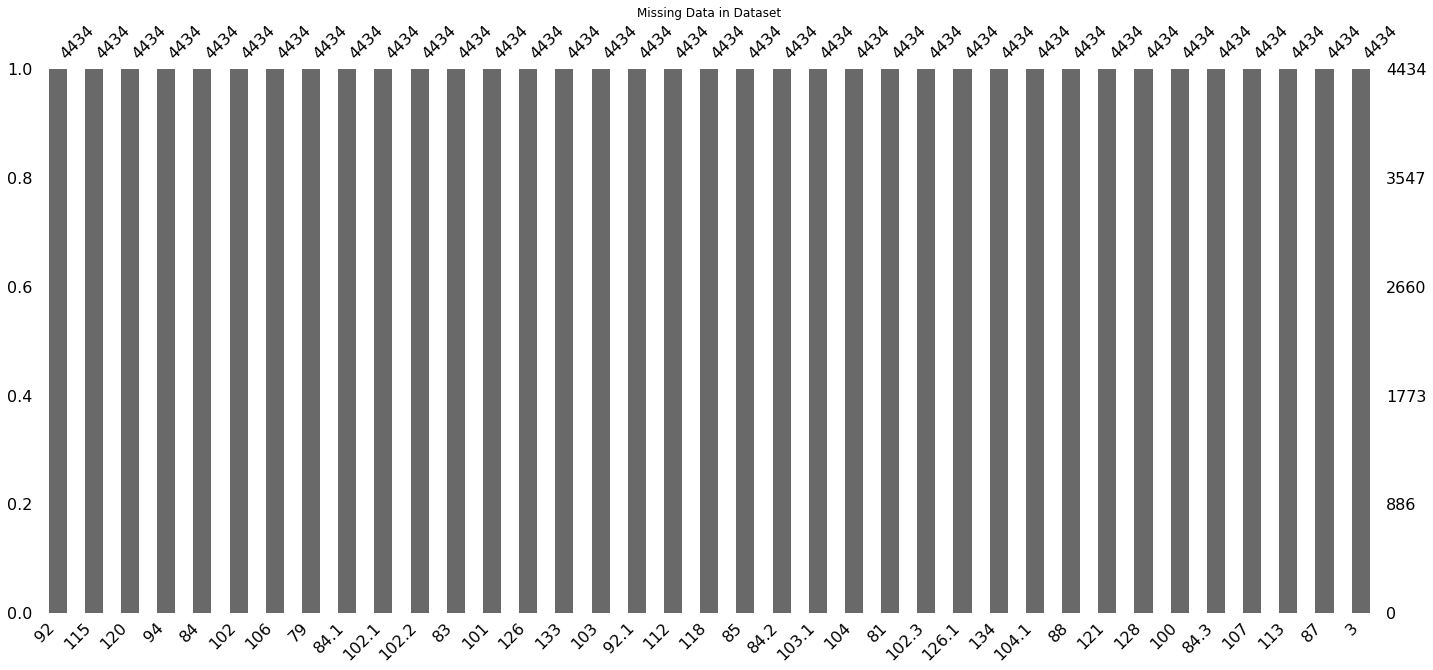

In [ ]:

#Q4 tuning hyper-parameters
#Reading the training and test files
filename = 'C:/Users/TheVo/Google Drive/NCAT PHD Courses/CSE 805 Machine Learning Files/Final Exam Study/Final Exam Datasets/sat.trn.txt'
sat_data= read_csv(filename, sep=' ')
#checking for outliers and missing values
sat_cleaned = sat_data
msno.bar(sat_cleaned)
plt.title('Missing Data in Dataset')
mean = sat_cleaned.mean()
std = sat_cleaned.std()
outrows = []
for j in range(0, len(sat_cleaned.columns)-1):
    outlier = 0
    for i in range(0, len(sat_cleaned.index)):
        z_score = (sat_cleaned.iloc[i,j]-mean[j])/std[j]
        if abs(z_score) > 3:
            outlier += 1
            outrows.append(i)
    print("\nThere are ", outlier, " outlier elements in column ", j)
outrows = set(outrows)
#removing outlier rows
sat_cleaned = sat_cleaned.drop(index=outrows, axis=0)
#defining X and Y for model training
array = sat_cleaned.values
Xs = array[:,0:36]
Ys = array[:,36]
X_train, X_validation, Y_train, Y_validation = train_test_split(Xs, Ys, test_size=0.20, random_state=1)

In [ ]:
# Spot Check Algorithms
models = []
models.append(('NB', GaussianNB(var_smoothing=10e-09)))
models.append(('RF', RandomForestClassifier(n_estimators=10, 
                                            min_samples_split=3, 
                                            min_samples_leaf=2,class_weight='balanced',
                                            max_features=10)))
models.append(('SVM', SVC(kernel='linear',gamma='scale', C=0.1, class_weight='balanced',
                          decision_function_shape='ovo')))
models.append(('KNN', KNeighborsClassifier(n_neighbors=9, weights='distance',
                                           metric='euclidean')))
models.append(('LR', linear_model.LogisticRegression(solver='saga', 
                                                     multi_class='multinomial',
                                                     penalty='none',
                                                     C=0.1)))

In [ ]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    clf = model
    clf.fit(X_train, Y_train)
    y_pred = clf.predict(X_validation)
    CM = confusion_matrix(Y_validation, y_pred)
    FP = CM.sum(axis=0) - np.diag(CM)  
    FN = CM.sum(axis=1) - np.diag(CM)
    TP = np.diag(CM)
    TN = CM.sum() - (FP + FN + TP)
    # False discovery rate
    FDR = FP/(TP+FP)
    FDR = FDR[~np.isnan(FDR)]
    #average false positive rate for all classes
    avgFDR = FDR.sum()/len(FDR)
    print('\n%s: %f (%f)' % (name,cv_results.mean(), cv_results.std()))
    print("False alarm rate for ", name, "is ",'%.3f' %avgFDR)
    print("kappa accuracy:",'%.3f' %metrics.cohen_kappa_score(Y_validation, y_pred))


NB: 0.787155 (0.018112)
False alarm rate for  NB is  0.208
kappa accuracy: 0.765

RF: 0.892700 (0.016885)
False alarm rate for  RF is  0.108
kappa accuracy: 0.874

SVM: 0.846174 (0.014581)
False alarm rate for  SVM is  0.179
kappa accuracy: 0.805

KNN: 0.894155 (0.013465)
False alarm rate for  KNN is  0.093
kappa accuracy: 0.890


C:\Users\TheVo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\TheVo\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\TheVo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\TheVo\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\TheVo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\TheVo\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter 


LR: 0.794999 (0.018847)
False alarm rate for  LR is  0.197
kappa accuracy: 0.745


C:\Users\TheVo\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


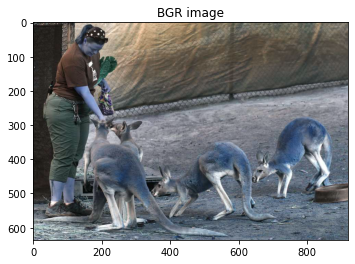

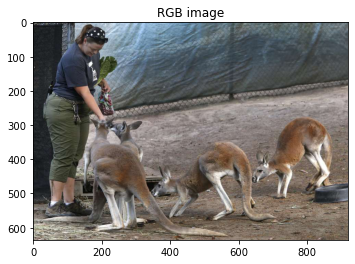

In [ ]:
#Q5 Using kangaroo images to classify between humans, background and scenery
#defining the function used to read all images in a folder
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        if filename.endswith(".jpg"):
            img = cv2.imread(os.path.join(folder, filename))
            if img is not None:
                images.append(img)
    return images
#defining the path that is used to access the image folders
root_folder = r"C:\Users\TheVo\Google Drive\NCAT PHD Courses\CSE 805 Machine Learning Files\Final Exam Study\Final Exam Datasets\kangaroo images"
kang_images = load_images_from_folder(root_folder)
kang_RGB=[]
for i in range(len(kang_images)):
    kang_rgb=cv2.cvtColor(kang_images[i], cv2.COLOR_BGR2RGB)
    kang_RGB.append(kang_rgb)
#displaying image as example
plt.imshow(kang_images[2])
plt.title('BGR image')
plt.show()

plt.imshow(kang_RGB[2])
plt.title('RGB image')
plt.show()

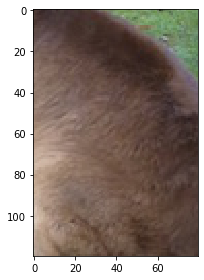

In [ ]:
#cropping kangaroo patches from some of the images
k_patches = []
img = kang_RGB[2]
k_patch = img[300:550,190:300]
imshow(k_patch)
k_patches.append(k_patch)
k_patch = img[290:420, 710:840]
imshow(k_patch)
k_patches.append(k_patch)
k_patch = img[360:500, 530:700]
imshow(k_patch)
k_patches.append(k_patch)
img = kang_RGB[4]
imshow(img)
k_patch = img[0:320, 140:200]
imshow(k_patch)
k_patches.append(k_patch)
k_patch = img[150:260, 420:640]
imshow(k_patch)
k_patches.append(k_patch)
img = kang_RGB[8]
imshow(img)
k_patch = img[200:550, 680:760]
imshow(k_patch)
k_patches.append(k_patch)
img = kang_RGB[6]
imshow(img)
k_patch = img[520:640, 340:420]
imshow(k_patch)
k_patches.append(k_patch)

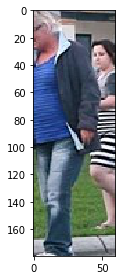

In [ ]:
#cropping human patched from some images
h_patches = []
img = kang_RGB[2]
imshow(img)
h_patch = img[50:550, 40:180]
imshow(h_patch)
h_patches.append(h_patch)
img = kang_RGB[5]
imshow(img)
h_patch = img[110:370, 430:500]
imshow(h_patch)
h_patches.append(h_patch)
img = kang_RGB[6]
imshow(img)
h_patch = img[210:600, 150:280]
imshow(h_patch)
h_patches.append(h_patch)
img = kang_RGB[7]
imshow(img)
h_patch = img[70:250, 250:310]
imshow(h_patch)
h_patches.append(h_patch)

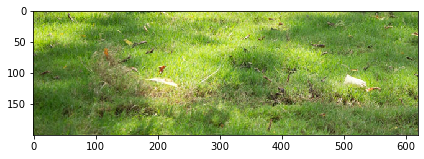

In [ ]:
#cropping scenery patches from some images
s_patches = []
img = kang_RGB[1]
imshow(img)
s_patch = img[500:610, 0:1000]
imshow(s_patch)
s_patches.append(s_patch)
img = kang_RGB[2]
imshow(img)
s_patch = img[0:250, 250:850]
imshow(s_patch)
s_patches.append(s_patch)
img = kang_RGB[5]
imshow(img)
s_patch = img[0:150, 0:150]
imshow(s_patch)
s_patches.append(s_patch)
img = kang_RGB[7]
imshow(img)
s_patch = img[0:50, 200:620]
imshow(s_patch)
s_patches.append(s_patch)
img = kang_RGB[8]
imshow(img)
s_patch = img[450:650, 0:620]
imshow(s_patch)
s_patches.append(s_patch)

In [ ]:
#Looping over the kangaroo patches to extract kangaroo information
k_red = []
k_green = []
k_blue = []

for l in range(len(k_patches)):
    img = k_patches[l]
    img = resize(img, (30,30))
    for i in range(0, 30, 3):
        for j in range (0, 30, 3):
            p = img[j:j+3,i:i+3]
            red = np.reshape(p[:,:,0], -1)
            k_red.append(red)
            green = np.reshape(p[:,:,1], -1)
            k_green.append(green)
            blue = np.reshape(p[:,:,2], -1)
            k_blue.append(blue)

In [ ]:
#Looping over the human patches to extract human information
h_red = []
h_green = []
h_blue = []

for l in range(len(h_patches)):
    img = h_patches[l]
    img = resize(img, (30,30))
    for i in range(0, 30, 3):
        for j in range (0, 30, 3):
            p = img[j:j+3,i:i+3]
            red = np.reshape(p[:,:,0], -1)
            h_red.append(red)
            green = np.reshape(p[:,:,1], -1)
            h_green.append(green)
            blue = np.reshape(p[:,:,2], -1)
            h_blue.append(blue)

In [ ]:
#Looping over the scenery patches to extract scenery information
s_red = []
s_green = []
s_blue = []

for l in range(len(h_patches)):
    img = s_patches[l]
    img = resize(img, (30,30))
    for i in range(0, 30, 3):
        for j in range (0, 30, 3):
            p = img[j:j+3,i:i+3]
            red = np.reshape(p[:,:,0], -1)
            s_red.append(red)
            green = np.reshape(p[:,:,1], -1)
            s_green.append(green)
            blue = np.reshape(p[:,:,2], -1)
            s_blue.append(blue)

In [ ]:
#calculating mean values
red_k_mean = []
green_k_mean = []
blue_k_mean = []
red_h_mean = []
green_h_mean = []
blue_h_mean = []
red_s_mean = []
green_s_mean = []
blue_s_mean = []

for i in range(len(k_red)):
    rmean = np.mean(k_red[i])
    red_k_mean.append(rmean)
    gmean = np.mean(k_green[i])
    green_k_mean.append(gmean)
    bmean = np.mean(k_blue[i])
    blue_k_mean.append(bmean)
for i in range(len(h_red)):
    rmean = np.mean(h_red[i])
    red_h_mean.append(rmean)
    gmean = np.mean(h_green[i])
    green_h_mean.append(gmean)
    bmean = np.mean(h_blue[i])
    blue_h_mean.append(bmean)
for i in range(len(s_red)):
    rmean = np.mean(s_red[i])
    red_s_mean.append(rmean)
    gmean = np.mean(s_green[i])
    green_s_mean.append(gmean)
    bmean = np.mean(s_blue[i])
    blue_s_mean.append(bmean)

In [ ]:
#calculating std dev values
red_k_std = []
green_k_std = []
blue_k_std = []
red_h_std = []
green_h_std = []
blue_h_std = []
red_s_std = []
green_s_std = []
blue_s_std = []

for i in range(len(k_red)):
    rmean = np.std(k_red[i])
    red_k_std.append(rmean)
    gmean = np.std(k_green[i])
    green_k_std.append(gmean)
    bmean = np.std(k_blue[i])
    blue_k_std.append(bmean)
for i in range(len(h_red)):
    rmean = np.std(h_red[i])
    red_h_std.append(rmean)
    gmean = np.std(h_green[i])
    green_h_std.append(gmean)
    bmean = np.std(h_blue[i])
    blue_h_std.append(bmean)
for i in range(len(s_red)):
    rmean = np.std(s_red[i])
    red_s_std.append(rmean)
    gmean = np.std(s_green[i])
    green_s_std.append(gmean)
    bmean = np.std(s_blue[i])
    blue_s_std.append(bmean)

In [ ]:
#calculating variance values
red_k_var = []
green_k_var = []
blue_k_var = []
red_h_var = []
green_h_var = []
blue_h_var = []
red_s_var = []
green_s_var = []
blue_s_var = []

for i in range(len(k_red)):
    rmean = np.var(k_red[i])
    red_k_var.append(rmean)
    gmean = np.var(k_green[i])
    green_k_var.append(gmean)
    bmean = np.var(k_blue[i])
    blue_k_var.append(bmean)
for i in range(len(h_red)):
    rmean = np.var(h_red[i])
    red_h_var.append(rmean)
    gmean = np.var(h_green[i])
    green_h_var.append(gmean)
    bmean = np.var(h_blue[i])
    blue_h_var.append(bmean)
for i in range(len(s_red)):
    rmean = np.var(s_red[i])
    red_s_var.append(rmean)
    gmean = np.var(s_green[i])
    green_s_var.append(gmean)
    bmean = np.var(s_blue[i])
    blue_s_var.append(bmean)

In [ ]:
#preparing dataframes with the whole data and a manually defined class column
len(red_h_mean)
len(red_s_mean)
red_class = []
for i in range (0,700):
    c = 1
    red_class.append(c)
for i in range (0,400):
    c2 = 2
    red_class.append(c2)
for i in range (0,400):
    c3 = 3
    red_class.append(c3)
redmean = red_k_mean + red_h_mean + red_s_mean
redstd = red_k_std + red_h_std + red_s_std
redvar = red_k_var + red_h_var + red_s_var
greenmean = green_k_mean + green_h_mean + green_s_mean
greenstd = green_k_std + green_h_std + green_s_std
greenvar = green_k_var + green_h_var + green_s_var
bluemean = blue_k_mean + blue_h_mean + blue_s_mean
bluestd = blue_k_std + blue_h_std + blue_s_std
bluevar = blue_k_var + blue_h_var + blue_s_var
df = pd.DataFrame(redmean, columns=["rmean"])
df["rstd"] = redstd
df["rvar"] = redvar
df["gmean"] = greenmean
df["gstd"] = greenstd
df["gvar"] = greenvar
df["bmean"] = bluemean
df["bstd"] = bluestd
df["bvar"] = bluevar
df["class"] = red_class
df.head(20)

,rmean,rstd,rvar,gmean,gstd,gvar,bmean,bstd,bvar,class
0,0.430792,0.082863,0.006866,0.377971,0.090830,0.008250,0.339046,0.095238,0.009070,1
1,0.590801,0.051632,0.002666,0.554297,0.052255,0.002731,0.552844,0.057400,0.003295,1
2,0.599225,0.018684,0.000349,0.554781,0.034083,0.001162,0.552651,0.048871,0.002388,1
3,0.523844,0.015238,0.000232,0.457710,0.014859,0.000221,0.422803,0.025734,0.000662,1
4,0.508109,0.084273,0.007102,0.456742,0.097082,0.009425,0.433358,0.120775,0.014586,1
5,0.397095,0.067505,0.004557,0.348390,0.074677,0.005577,0.315420,0.085053,0.007234,1
6,0.405035,0.047280,0.002235,0.388477,0.041742,0.001742,0.382038,0.042040,0.001767,1
7,0.198015,0.111025,0.012327,0.190608,0.112142,0.012576,0.190898,0.122073,0.014902,1
8,0.163883,0.014646,0.000215,0.140450,0.020016,0.000401,0.127378,0.016536,0.000273,1
9,0.226289,0.018817,0.000354,0.213798,0.019959,0.000398,0.194578,0.019617,0.000385,1


In [ ]:
#Training 2 models "SVM" and "KNN"
#SVM
Xi = df.drop(labels="class",axis=1)
Xi = Xi.values
Yi = df["class"]
Yi = Yi.values
X_train, X_validation, Y_train, Y_validation = train_test_split(Xi, Yi, test_size=0.2, random_state=1)
clf = SVC(decision_function_shape='ovo', gamma='auto', 
          C=1000, class_weight='balanced')
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_validation)
CM = confusion_matrix(Y_validation, Y_pred)
FP = CM.sum(axis=0) - np.diag(CM)  
FN = CM.sum(axis=1) - np.diag(CM)
TP = np.diag(CM)
TN = CM.sum() - (FP + FN + TP)
# False discovery rate
FDR = FP/(TP+FP)
FDR = FDR[~np.isnan(FDR)]
#average false positive rate for all classes
avgFDRsvm = FDR.sum()/len(FDR)
#10-fold cross validation
scores = cross_val_score(clf, X_train, Y_train, cv=10)
print("SVM 10-fold cross validation: ")
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
print("SVM false alarm rate: ", avgFDRsvm)

SVM 10-fold cross validation: 
0.67 accuracy with a standard deviation of 0.04
SVM false alarm rate:  0.296171776110648


In [ ]:
#KNN
clf2 = KNeighborsClassifier(n_neighbors=4, weights='distance', metric='euclidean')
clf2.fit(X_train, Y_train)
Y_pred = clf2.predict(X_validation)
CM = confusion_matrix(Y_validation, Y_pred)
FP = CM.sum(axis=0) - np.diag(CM)  
FN = CM.sum(axis=1) - np.diag(CM)
TP = np.diag(CM)
TN = CM.sum() - (FP + FN + TP)
# False discovery rate
FDR = FP/(TP+FP)
FDR = FDR[~np.isnan(FDR)]
#average false positive rate for all classes
avgFDRknn = FDR.sum()/len(FDR)
#10-fold cross validation
scores2 = cross_val_score(clf2, X_train, Y_train, cv=10)
print("KNN 10-fold cross validation: ")
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores2.mean(), scores2.std()))
print("KNN false alarm rate: ", avgFDRknn)

KNN 10-fold cross validation: 
0.80 accuracy with a standard deviation of 0.03
KNN false alarm rate:  0.17779718922276574


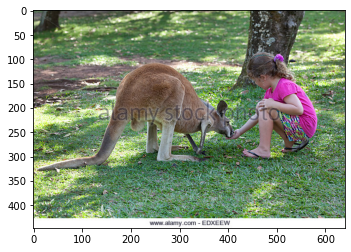

In [ ]:
#applying the algorithms on an image
#reading test images
img11 = cv2.imread(r"C:\Users\TheVo\Google Drive\NCAT PHD Courses\CSE 805 Machine Learning Files\Final Exam Study\Final Exam Datasets\11.jpg")
img12 = cv2.imread(r"C:\Users\TheVo\Google Drive\NCAT PHD Courses\CSE 805 Machine Learning Files\Final Exam Study\Final Exam Datasets\12.jpg")
img11 = cv2.cvtColor(img11, cv2.COLOR_BGR2RGB)
img12 = cv2.cvtColor(img12, cv2.COLOR_BGR2RGB)
plt.imshow(img11)
plt.show()

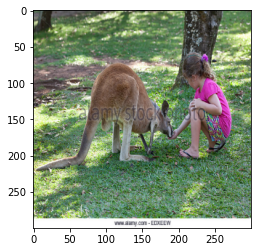

In [ ]:
#classifying image 11
img11r=resize(img11, (300,300))
plt.imshow(img11r)
plt.show()

In [ ]:
#classifying with SVM
m = img11r.shape[0]
n = img11r.shape[1]
result = zeros((300,300))
for i in range(0, m, 3):
    for j in range(0, n, 3):
        patch = img11r[j:j+3,i:i+3,:]
        rmean = np.mean(patch[:,:,0])
        gmean = np.mean(patch[:,:,1])
        bmean = np.mean(patch[:,:,2])
        rstd = np.std(patch[:,:,0])
        gstd = np.std(patch[:,:,1])
        bstd = np.std(patch[:,:,2])
        rvar = np.var(patch[:,:,0])
        gvar = np.var(patch[:,:,1])
        bvar = np.var(patch[:,:,2])
        patchstats = np.array([rmean, rstd, rvar, gmean, gstd, gvar, bmean, bstd, bvar])
        patchstats = patchstats.reshape(1,9)
        y_pred = clf.predict(patchstats)
        if y_pred == 1:
            result[j:j+3,i:i+3] = 0
        elif y_pred == 2:
            result[j:j+3,i:i+3] = 125
        elif y_pred == 3:
            result[j:j+3,i:i+3] = 255

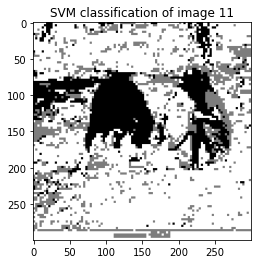

In [ ]:
plt.imshow(result, cmap=plt.cm.gray)
plt.title("SVM classification of image 11")
plt.show()

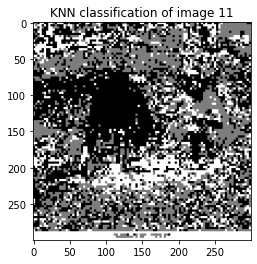

In [ ]:
#classifying with KNN
m = img11r.shape[0]
n = img11r.shape[1]
result = zeros((300,300))
for i in range(0, m, 3):
    for j in range(0, n, 3):
        patch = img11r[j:j+3,i:i+3,:]
        rmean = np.mean(patch[:,:,0])
        gmean = np.mean(patch[:,:,1])
        bmean = np.mean(patch[:,:,2])
        rstd = np.std(patch[:,:,0])
        gstd = np.std(patch[:,:,1])
        bstd = np.std(patch[:,:,2])
        rvar = np.var(patch[:,:,0])
        gvar = np.var(patch[:,:,1])
        bvar = np.var(patch[:,:,2])
        patchstats = np.array([rmean, rstd, rvar, gmean, gstd, gvar, bmean, bstd, bvar])
        patchstats = patchstats.reshape(1,9)
        y_pred = clf2.predict(patchstats)
        if y_pred == 1:
            result[j:j+3,i:i+3] = 0
        elif y_pred == 2:
            result[j:j+3,i:i+3] = 125
        elif y_pred == 3:
            result[j:j+3,i:i+3] = 255

plt.imshow(result, cmap=plt.cm.gray)
plt.title("KNN classification of image 11")
plt.show()

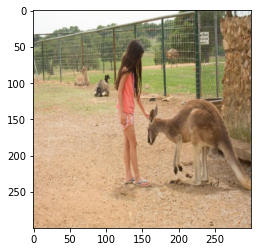

In [ ]:
#classifying image 12
img12r=resize(img12, (300,300))
plt.imshow(img12r)
plt.show()

In [ ]:
#classifying with SVM
m = img12r.shape[0]
n = img12r.shape[1]
result2 = zeros((300,300))
for i in range(0, m, 3):
    for j in range(0, n, 3):
        patch = img12r[j:j+3,i:i+3,:]
        rmean = np.mean(patch[:,:,0])
        gmean = np.mean(patch[:,:,1])
        bmean = np.mean(patch[:,:,2])
        rstd = np.std(patch[:,:,0])
        gstd = np.std(patch[:,:,1])
        bstd = np.std(patch[:,:,2])
        rvar = np.var(patch[:,:,0])
        gvar = np.var(patch[:,:,1])
        bvar = np.var(patch[:,:,2])
        patchstats = np.array([rmean, rstd, rvar, gmean, gstd, gvar, bmean, bstd, bvar])
        patchstats = patchstats.reshape(1,9)
        y_pred = clf.predict(patchstats)
        if y_pred == 1:
            result2[j:j+3,i:i+3] = 0
        elif y_pred == 2:
            result2[j:j+3,i:i+3] = 125
        elif y_pred == 3:
            result2[j:j+3,i:i+3] = 255

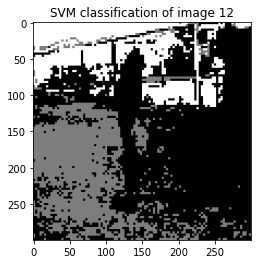

In [ ]:
plt.imshow(result2, cmap=plt.cm.gray)
plt.title("SVM classification of image 12")
plt.show()

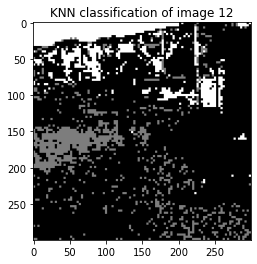

In [ ]:
#classifying with KNN
m = img12r.shape[0]
n = img12r.shape[1]
result2 = zeros((300,300))
for i in range(0, m, 3):
    for j in range(0, n, 3):
        patch = img12r[j:j+3,i:i+3,:]
        rmean = np.mean(patch[:,:,0])
        gmean = np.mean(patch[:,:,1])
        bmean = np.mean(patch[:,:,2])
        rstd = np.std(patch[:,:,0])
        gstd = np.std(patch[:,:,1])
        bstd = np.std(patch[:,:,2])
        rvar = np.var(patch[:,:,0])
        gvar = np.var(patch[:,:,1])
        bvar = np.var(patch[:,:,2])
        patchstats = np.array([rmean, rstd, rvar, gmean, gstd, gvar, bmean, bstd, bvar])
        patchstats = patchstats.reshape(1,9)
        y_pred = clf2.predict(patchstats)
        if y_pred == 1:
            result2[j:j+3,i:i+3] = 0
        elif y_pred == 2:
            result2[j:j+3,i:i+3] = 125
        elif y_pred == 3:
            result2[j:j+3,i:i+3] = 255

plt.imshow(result2, cmap=plt.cm.gray)
plt.title("KNN classification of image 12")
plt.show()